In [6]:
### Add noise to the original data

In [48]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [66]:
function='tanh'
file_model='NN_function_' + function + '_NREP_10_data' + '.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
d=d.drop(columns='Unnamed: 0')
display(d)
print(d.index.stop)

,x1,y,rep
0,-4.00,0.000000,0.0
1,-3.95,0.000344,0.0
2,-3.90,0.000711,0.0
3,-3.85,0.001102,0.0
4,-3.80,0.001519,0.0
...,...,...,...
1595,3.75,0.999019,9.0
1596,3.80,0.998911,9.0
1597,3.85,0.998800,9.0
1598,3.90,0.998686,9.0


1600


In [67]:
#Generate noise
np.random.seed(seed=1111)

mean=0;sigma=0.05;sample=d.index.stop
noise = np.random.normal(mean,sigma,sample)
display(noise)

array([-0.06500052, -0.05364945,  0.03950996, ..., -0.11487266,
        0.04459117,  0.04992265])

In [68]:
d['noise']=noise
d['y_noise']=d['y'] + noise
display(d)
d.to_csv('../data/'+ 'NN_noisy_signal_' + function + '.csv')

,x1,y,rep,noise,y_noise
0,-4.00,0.000000,0.0,-0.065001,-0.065001
1,-3.95,0.000344,0.0,-0.053649,-0.053306
2,-3.90,0.000711,0.0,0.039510,0.040221
3,-3.85,0.001102,0.0,-0.043913,-0.042811
4,-3.80,0.001519,0.0,0.075091,0.076610
...,...,...,...,...,...
1595,3.75,0.999019,9.0,0.002986,1.002006
1596,3.80,0.998911,9.0,0.023471,1.022382
1597,3.85,0.998800,9.0,-0.114873,0.883927
1598,3.90,0.998686,9.0,0.044591,1.043278


,x1,y,rep,noise,y_noise
480,-4.00,1.000000,3.0,-0.104967,0.895033
481,-3.95,0.999999,3.0,-0.006009,0.993990
482,-3.90,0.999998,3.0,-0.024875,0.975123
483,-3.85,0.999997,3.0,0.022863,1.022860
484,-3.80,0.999996,3.0,-0.011263,0.988733
...,...,...,...,...,...
635,3.75,0.036030,3.0,0.003068,0.039098
636,3.80,0.027022,3.0,-0.033907,-0.006884
637,3.85,0.018015,3.0,0.007974,0.025989
638,3.90,0.009007,3.0,0.066945,0.075953


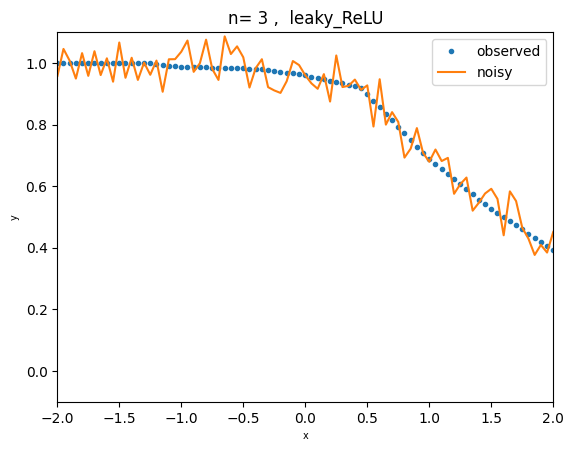

In [64]:
n=3
dn=d[d['rep']==n]
display(dn)

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size

plt.plot(dn.x1,dn.y,'.',label='observed')
plt.plot(dn.x1,dn.y_noise,label='noisy')
plt.title('n= %d ,  %s'  %(n, function)) 
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xlim(-2,2);plt.ylim(-0.1,1.1)
plt.legend(loc='best')

Name_figure='noisy_signal_' + function + '_' + str(n)
plt.savefig('../results/' + Name_figure + '.png',dpi=300)